# Loading and combining AMPS Netcdfs 
### Notebook for testing out methods of getting AMPS data into zarr format in our google bucket: gs://ldeo-glaciology 
We already have many AMPS netcdfs in the googlebucket https://storage.googleapis.com/ldeo-glaciology/AMPS/. 
Our aim to to combine them into an analysis-ready format.
The best option will be going from the NCAR HPC access server (?) directly to boogle bucket (GB). But in the meantime we can try going from local netcdfs to GB. This script does this. 

In [2]:
import xarray as xr
import fsspec
import zarr
import gcsfs
xr.set_options(display_style="html");


### load the data from local
I downloaded two netcdfs (~680 Mb each). The code below opens them and concatenates them along the time dimension

In [3]:
AMPS = xr.open_mfdataset('wrfout_d03_2016122200_f*.nc',concat_dim= 'Time')
AMPS

/Users/jkingslake/opt/anaconda3/envs/geo_scipy_3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/jkingslake/opt/anaconda3/envs/geo_scipy_3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfda

<xarray.Dataset>
Dimensions:                (Time: 2, bottom_top: 60, bottom_top_stag: 61, soil_layers_stag: 4, south_north: 825, south_north_stag: 826, west_east: 537, west_east_stag: 538)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    XLONG                  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    XTIME                  (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    XLAT_U                 (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 825, 538), meta=np.ndarray>
    XLONG_U                (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 825, 538), meta=np.ndarray>
    XLAT_V                 (Time, south_north_stag, west_east) float32 dask.array<chunksize=(1, 826, 537), meta=np.ndarray>
    XLONG_V                (Time, south_north_stag, west_east) float32 dask.array<chunksize=(1, 826, 537), meta=np.ndarray>
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 dask.array<chunksize=(1,), meta=np.ndarray>
    LU_INDEX               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ZNU                    (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    ZNW                    (Time, bottom_top_stag) float32 dask.array<chunksize=(1, 61), meta=np.ndarray>
    ZS                     (Time, soil_layers_stag) float32 dask.array<chunksize=(1, 4), meta=np.ndarray>
    DZS                    (Time, soil_layers_stag) float32 dask.array<chunksize=(1, 4), meta=np.ndarray>
    U                      (Time, bottom_top, south_north, west_east_stag) float32 dask.array<chunksize=(1, 60, 825, 538), meta=np.ndarray>
    V                      (Time, bottom_top, south_north_stag, west_east) float32 dask.array<chunksize=(1, 60, 826, 537), meta=np.ndarray>
    W                      (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(1, 61, 825, 537), meta=np.ndarray>
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(1, 61, 825, 537), meta=np.ndarray>
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 dask.array<chunksize=(1, 61, 825, 537), meta=np.ndarray>
    T                      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 60, 825, 537), meta=np.ndarray>
    MU                     (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    MUB                    (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    NEST_POS               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    P                      (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 60, 825, 537), meta=np.ndarray>
    PB                     (Time, bottom_top, south_north, west_east) float32 dask.array<chunksize=(1, 60, 825, 537), meta=np.ndarray>
    FNM                    (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    FNP                    (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    RDNW                   (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    RDN                    (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    DNW                    (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    DN                     (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    CFN                    (Time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    CFN1                   (Time) flo

The code below signs us in to the google bucket. Use a google account that has been given write access (email Jonny or Tim for access to teh LDEO-glaciology GB). On my mac laptop I found that my credentials were stored in the file shown below as the value for token. More options in providing credentials are here: https://gcsfs.readthedocs.io/en/latest/. I created the directory AMPS_zarr in the google bucket, but Im sure there is a way to do that from here. 

In [14]:
fs = gcsfs.GCSFileSystem('rosy-hope-23661', token='/Users/jkingslake/.config/gcloud/legacy_credentials/jk3930@columbia.edu/adc.json')
gcsmap = gcsfs.mapping.GCSMap('gs://ldeo-glaciology/AMPS_zarr', gcs=fs, check=True, create=False)


### Look at what's in the google bucket.

In [15]:
fs.ls('gs://ldeo-glaciology')

['ldeo-glaciology/8m',
 'ldeo-glaciology/AMPS',
 'ldeo-glaciology/snowmelt.KNMI-1981.ANT27.ERAINx_RACMO2.4.1.DD.nc',
 'ldeo-glaciology/test.nc',
 'ldeo-glaciology/tskin_snowmelt_precip6']

## Write a zarr file to a local directory

In [6]:
AMPS.to_zarr('AMPStest.zarr')

## Write the zarr file directly to the google bucket 
(this took ~20 minutes with only two netcdfs in the xarray)

In [16]:
AMPS.to_zarr(store=gcsmap)

## Reload the data to check that it worked
This only takes <1 min becuase it loads it lazily.

In [17]:
AMPS_gcs = xr.open_zarr(gcsmap)
AMPS_gcs

<xarray.Dataset>
Dimensions:                (Time: 2, bottom_top: 60, bottom_top_stag: 61, soil_layers_stag: 4, south_north: 825, south_north_stag: 826, west_east: 537, west_east_stag: 538)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    XLAT_U                 (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 825, 538), meta=np.ndarray>
    XLAT_V                 (Time, south_north_stag, west_east) float32 dask.array<chunksize=(1, 826, 537), meta=np.ndarray>
    XLONG                  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    XLONG_U                (Time, south_north, west_east_stag) float32 dask.array<chunksize=(1, 825, 538), meta=np.ndarray>
    XLONG_V                (Time, south_north_stag, west_east) float32 dask.array<chunksize=(1, 826, 537), meta=np.ndarray>
    XTIME                  (Time) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    ACGRDFLX               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACHFX                  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLHF                  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWDNB                (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWDNBC               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWDNT                (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWDNTC               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWUPB                (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWUPBC               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWUPT                (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ACLWUPTC               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ALBBCK                 (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    ALBEDO                 (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    CANWAT                 (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    CF1                    (Time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    CF2                    (Time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    CF3                    (Time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    CFN                    (Time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    CFN1                   (Time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    COSALPHA               (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    DN                     (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    DNW                    (Time, bottom_top) float32 dask.array<chunksize=(1, 60), meta=np.ndarray>
    DZS                    (Time, soil_layers_stag) float32 dask.array<chunksize=(1, 4), meta=np.ndarray>
    E                      (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    EMISS                  (Time, south_north, west_east) float32 dask.array<chunksize=(1, 825, 537), meta=np.ndarray>
    F                      (Time, south_north, west

## Plot a random field (ALBEDO) from the first time step

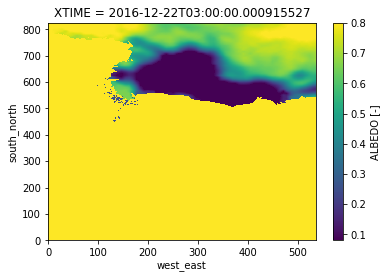

In [20]:
AMPS_gcs.ALBEDO.isel(Time=0).plot()